# Exploration and Preprocessing
- Daniel Branco, 20220599
- Fernando Cruz, 20220646
- Inês Ventura, 20220612
- Maria Mendonça, 20220625

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from langdetect import detect
import spacy.cli
import pickle
import os
import spacy
import emoji
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Text Mining/

/content/drive/MyDrive/Text Mining


In [ ]:
airbnb_df_train = pd.read_excel('train.xlsx')
airbnb_df_test = pd.read_excel('test.xlsx')

reviews_df_train = pd.read_excel('train_reviews.xlsx')
reviews_df_test = pd.read_excel('test_reviews.xlsx')

In [ ]:
airbnb_df_train

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
12491,12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0
12492,12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0
12493,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0
12494,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1


In [ ]:
reviews_df_train

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
721397,12494,"We had a good time, the apartment has a great ..."
721398,12494,Great apartment in very central location. The ...
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li..."
721400,12494,We had a lovely stay at this apartment. Sofia ...


### Airbnb dataframe

In [ ]:
airbnb_df_train = airbnb_df_train.rename(columns={'index': 'apartment_id'})
airbnb_df_train.set_index('apartment_id', inplace=True)
airbnb_df_train

,description,host_about,unlisted
apartment_id,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...
12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0
12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0
12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0


### Reviews dataframe

In [ ]:
reviews_df_train = reviews_df_train.rename(columns={'index': 'apartment_id'})
reviews_df_train.set_index('apartment_id', inplace=True)
reviews_df_train

,comments
apartment_id,
1,this is a very cozy and comfortable house to s...
1,good<br/>
1,"My first hostel experience, and all I have to ..."
1,Das Hostel war neu und deshalb funktionierte a...
1,"It was fine for a dorm, but I think for the pe..."
...,...
12494,"We had a good time, the apartment has a great ..."
12494,Great apartment in very central location. The ...
12494,"We are Airbnb Super Hosts too, so trust me, Li..."


## Exploration

In [ ]:
print("The number of apartments that the airbnb has:", len(airbnb_df_train.index.unique()))

The number of apartments that the airbnb has: 12496


In [ ]:
#Checking if we have the same number on the reviews dataframe, in order to evaluate if all the apartments have reviews
print("The number of reviews that exists:", len(reviews_df_train.index.unique()))

The number of reviews that exists: 8467


In [ ]:
indexes_only_in_airbnb = airbnb_df_train.index[~airbnb_df_train.index.isin(reviews_df_train.index)]

print("Indexes in airbnb_df but not in reviews_df:", indexes_only_in_airbnb)
print("Number of apartments that don't have reviews:", len(indexes_only_in_airbnb))

Indexes in airbnb_df but not in reviews_df: Int64Index([    2,     3,     4,     6,     7,    13,    15,    17,    18,
               21,
            ...
            12465, 12467, 12469, 12471, 12473, 12481, 12482, 12489, 12495,
            12496],
           dtype='int64', name='apartment_id', length=4029)
Number of apartments that don't have reviews: 4029


In [ ]:
# Number of columns in airbnb_df_train
print("Number of columns:", airbnb_df_train.shape[1])

Number of columns: 3


In [ ]:
# Number of columns in reviews_df_train
print("Number of columns:", reviews_df_train.shape[1])

Number of columns: 1


In [ ]:
airbnb_df_train.dtypes

description    object
host_about     object
unlisted        int64
dtype: object

In [ ]:
reviews_df_train.dtypes

comments    object
dtype: object

In [ ]:
def checkType(dataframe, column):
    number_rows_notStr = 0
    for index, comment in dataframe[column].iteritems():
        if not isinstance(comment, str):
            number_rows_notStr += 1
            print(f"Row {index}: {comment}")
    print(f"Total rows with non-string comments: {number_rows_notStr}")

### Description Variable

In [ ]:
#Checking the number of missing values in the description variable
airbnb_df_train['description'].isna().sum()

0

In [ ]:
checkType(airbnb_df_train, 'description')

Total rows with non-string comments: 0


<ipython-input-15-537b4b53aae9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, comment in dataframe[column].iteritems():


In [ ]:
#Number of empty descriptions
print("Number of airbnbs without description:", airbnb_df_train['description'].str.isspace().sum())

Number of airbnbs without description: 0


#### Word Count

In [ ]:
# Checking the number of words per description
airbnb_df_train['word_count_description']  = airbnb_df_train['description'].apply(lambda x: len(str(x).split(" ")))
wordCount_airbnb_df = airbnb_df_train[['description','word_count_description']].sort_values('word_count_description', ascending=True)
wordCount_airbnb_df.head(20)

,description,word_count_description
apartment_id,,
5683,<b>License number</b><br />7797/AL,3
10317,<b>License number</b><br />81309/AL,3
11607,<b>License number</b><br />87804/AL,3
7564,<b>License number</b><br />48184/AL,3
12194,<b>License number</b><br />Exempt,3
1870,<b>License number</b><br />Exempt,3
8535,<b>License number</b><br />Exempt,3
1876,<b>License number</b><br />Exempt,3
12181,<b>License number</b><br />Exempt,3


In [ ]:
airbnb_df_train.word_count_description.describe()

count    12496.000000
mean       132.663572
std         48.494104
min          3.000000
25%         99.000000
50%        157.000000
75%        167.000000
max        210.000000
Name: word_count_description, dtype: float64

In [ ]:
all_words = ' '.join(description for description in airbnb_df_train['description'] if isinstance(description, str)).split()

In [ ]:
freq = pd.Series(all_words).value_counts()

In [ ]:
freq.sort_values(ascending=False)[0:10]

the      62717
and      54907
a        50700
/><br    34826
to       30520
of       30050
in       28007
with     27033
is       23957
de       13708
dtype: int64

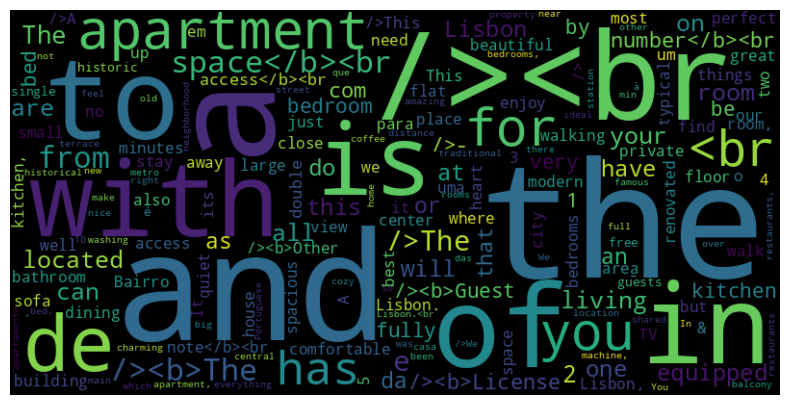

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Host-about Variable

In [ ]:
#Checking the number of missing values in the host_about variable
airbnb_df_train['host_about'].isna().sum()

0

In [ ]:
checkType(airbnb_df_train, 'host_about')

Total rows with non-string comments: 0


<ipython-input-15-537b4b53aae9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, comment in dataframe[column].iteritems():


In [ ]:
#Number of empty host_about
print("Number of airbnbs without information about the host:", airbnb_df_train['host_about'].str.isspace().sum())

Number of airbnbs without information about the host: 44


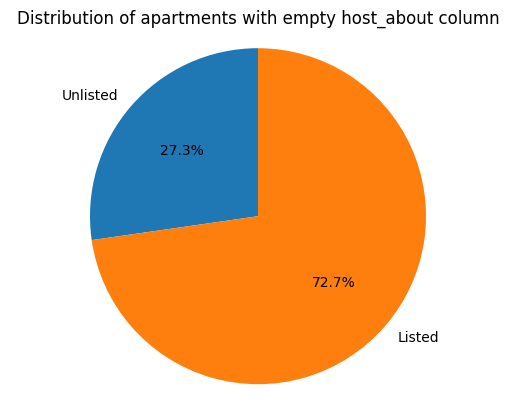

Percentage of unlisted apartments from all empty host_about column: 27.3
Percentage of listed apartments from all empty host_about column: 72.7


In [ ]:
# Check if apartments have an empty host_about column
empty_about = airbnb_df_train[airbnb_df_train['host_about'].str.isspace()]

# Count the number of unlisted and listed apartments among apartments with empty host_about
num_unlisted_empty_about = len(empty_about[empty_about['unlisted'] == 1])
num_listed_empty_about = len(empty_about[empty_about['unlisted'] == 0])

# Calculate the percentage of unlisted and listed apartments
total_empty_about = num_unlisted_empty_about + num_listed_empty_about
percentage_unlisted = (num_unlisted_empty_about / total_empty_about) * 100
percentage_listed = (num_listed_empty_about / total_empty_about) * 100

# Create a pie chart
labels = ['Unlisted', 'Listed']
numberProperties = [num_unlisted_empty_about, num_listed_empty_about]
plt.pie(numberProperties, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Distribution of apartments with empty host_about column')

# Display the chart
plt.show()

print("Percentage of unlisted apartments from all empty host_about column:", round(percentage_unlisted,1))
print("Percentage of listed apartments from all empty host_about column:", round(percentage_listed,1))


In [ ]:
# Doesn't seem to be related

#### Word Count

In [ ]:
# Checking the number of words per host_about
airbnb_df_train['word_count_host_about']  = airbnb_df_train['host_about'].apply(lambda x: len(str(x).split(" ")))
wordCount_airbnb_host_df = airbnb_df_train[['host_about','word_count_host_about']].sort_values('word_count_host_about', ascending=True)
wordCount_airbnb_host_df.head(20)

,host_about,word_count_host_about
apartment_id,,
10243,...,1
11348,\n\n,1
10615,0,1
3543,超级三脚猫,1
7656,_x000D_\n,1
4956,.,1
9332,_x000D_\n,1
3579,\n\n,1
7607,\n\n,1


In [ ]:
airbnb_df_train.word_count_host_about.describe()

count    12496.000000
mean        73.031050
std         77.132867
min          1.000000
25%         26.000000
50%         55.000000
75%        102.000000
max       1387.000000
Name: word_count_host_about, dtype: float64

In [ ]:
all_words = ' '.join(host_about for host_about in airbnb_df_train['host_about'] if isinstance(host_about, str)).split()

In [ ]:
freq.sort_values(ascending=False)[0:10]

the      62717
and      54907
a        50700
/><br    34826
to       30520
of       30050
in       28007
with     27033
is       23957
de       13708
dtype: int64

In [ ]:
freq = pd.Series(all_words).value_counts()

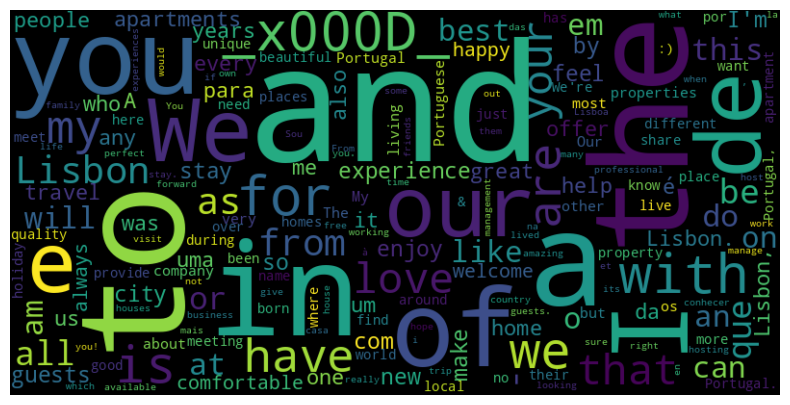

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

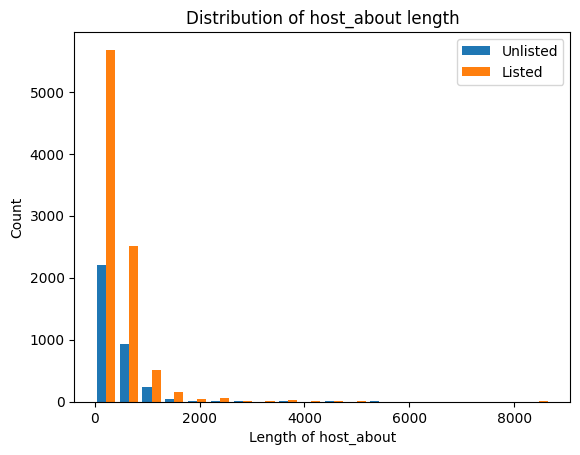

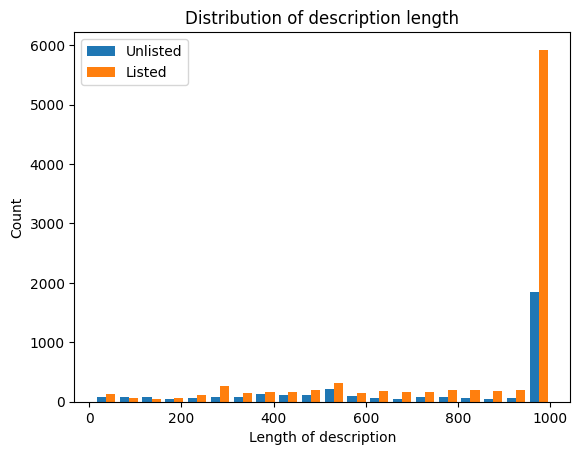

Average host_about length for unlisted apartments: 444.9
Average host_about length for listed apartments: 437.5
Average description length for unlisted apartments: 751.2
Average description length for listed apartments: 839.0


In [ ]:
# Filter unlisted and listed apartments
unlisted_apartments = airbnb_df_train[airbnb_df_train['unlisted'] == 1]
listed_apartments = airbnb_df_train[airbnb_df_train['unlisted'] == 0]

# Calculate the length of host_about for unlisted and listed apartments
unlisted_host_about_length = unlisted_apartments['host_about'].str.len()
listed_host_about_length = listed_apartments['host_about'].str.len()

# Calculate the length of description for unlisted and listed apartments
unlisted_description_length = unlisted_apartments['description'].str.len()
listed_description_length = listed_apartments['description'].str.len()

# Plot the distribution of host_about length
plt.hist([unlisted_host_about_length, listed_host_about_length], bins=20, label=['Unlisted', 'Listed'])
plt.xlabel('Length of host_about')
plt.ylabel('Count')
plt.title('Distribution of host_about length')
plt.legend()
plt.show()

# Plot the distribution of description length
plt.hist([unlisted_description_length, listed_description_length], bins=20, label=['Unlisted', 'Listed'])
plt.xlabel('Length of description')
plt.ylabel('Count')
plt.title('Distribution of description length')
plt.legend()
plt.show()

# Calculate statistics
unlisted_host_about_mean = np.mean(unlisted_host_about_length)
listed_host_about_mean = np.mean(listed_host_about_length)
unlisted_description_mean = np.mean(unlisted_description_length)
listed_description_mean = np.mean(listed_description_length)

print("Average host_about length for unlisted apartments:", round(unlisted_host_about_mean,1))
print("Average host_about length for listed apartments:", round(listed_host_about_mean,1))
print("Average description length for unlisted apartments:", round(unlisted_description_mean,1))
print("Average description length for listed apartments:", round(listed_description_mean,1))


### Unlisted Variable

In [ ]:
print("Number of airbnbs that aren't unlisted:", len(airbnb_df_train[airbnb_df_train['unlisted'] == 0]))
print("Number of airbnbs that are unlisted:", len(airbnb_df_train[airbnb_df_train['unlisted'] == 1]))


Number of airbnbs that aren't unlisted: 9033
Number of airbnbs that are unlisted: 3463


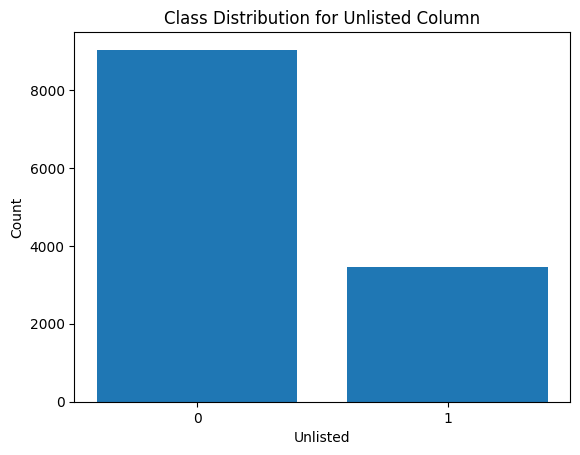

In [ ]:
# Class distribution
distribution_Unlisted = airbnb_df_train['unlisted'].value_counts()

# Plot the class distribution
plt.bar(distribution_Unlisted.index.astype(str), distribution_Unlisted.values)
plt.xlabel('Unlisted')
plt.ylabel('Count')
plt.title('Class Distribution for Unlisted Column')
plt.show()


In [ ]:
airbnb_df_train['unlisted'].describe()

count    12496.000000
mean         0.277129
std          0.447598
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: unlisted, dtype: float64

In [ ]:
#Checking the number of missing values in the unlisted variable
airbnb_df_train['unlisted'].isna().sum()

0

In [ ]:
# Filter unlisted apartments from airbnb_df
unlisted_apartments = airbnb_df_train[airbnb_df_train['unlisted'] == 1]

# Check if unlisted apartments don't have reviews
unlisted_without_reviews = unlisted_apartments.index[~unlisted_apartments.index.isin(reviews_df_train.index)]

# Check if all unlisted apartments don't have reviews
are_all_unlisted_without_reviews = len(unlisted_without_reviews) == len(unlisted_apartments)

# Print the result
if are_all_unlisted_without_reviews:
    print("All unlisted apartments don't have reviews.")
else:
    print("Not all unlisted apartments don't have reviews.\n The number of unlisted appartments are: ", len(unlisted_apartments), "the number of unlisted apartments without reviews are", len(unlisted_without_reviews))


Not all unlisted apartments don't have reviews.
 The number of unlisted appartments are:  3463 the number of unlisted apartments without reviews are 2927


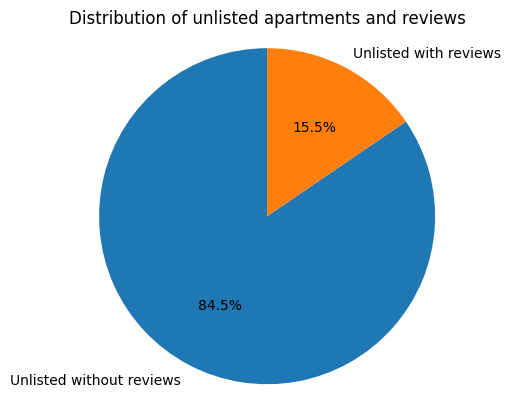

In [ ]:
# Filter unlisted apartments from airbnb_df
unlisted_apartments = airbnb_df_train[airbnb_df_train['unlisted'] == 1]

# Check if unlisted apartments have reviews
unlisted_with_reviews = unlisted_apartments.index[unlisted_apartments.index.isin(reviews_df_train.index)]

labels = ['Unlisted without reviews', 'Unlisted with reviews']
numberProperties = [
    len(unlisted_without_reviews), #unlisted apartments without reviews
    len(unlisted_with_reviews)  #unlisted apartments with reviews
    ]
# Create a pie chart
plt.pie(numberProperties, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Distribution of unlisted apartments and reviews')

# Display the chart
plt.show()

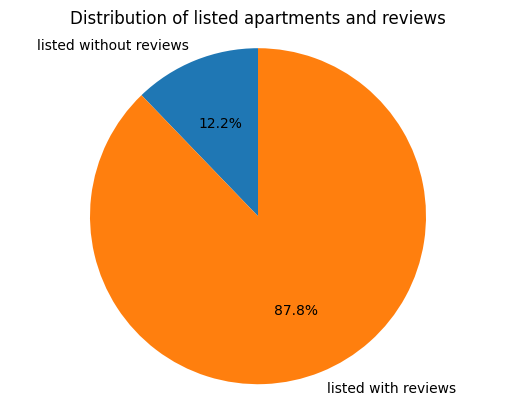

In [ ]:
# Filter unlisted apartments from airbnb_df
listed_apartments = airbnb_df_train[airbnb_df_train['unlisted'] == 0]

# Check if listed apartments have reviews
listed_with_reviews = listed_apartments.index[listed_apartments.index.isin(reviews_df_train.index)]
# Check if listed apartments have reviews
listed_without_reviews = listed_apartments.index[~listed_apartments.index.isin(reviews_df_train.index)]

labels = ['listed without reviews', 'listed with reviews']
numberProperties = [
    len(listed_without_reviews), #listed apartments without reviews
    len(listed_with_reviews)  #listed apartments with reviews
    ]
# Create a pie chart
plt.pie(numberProperties, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Distribution of listed apartments and reviews')

# Display the chart
plt.show()

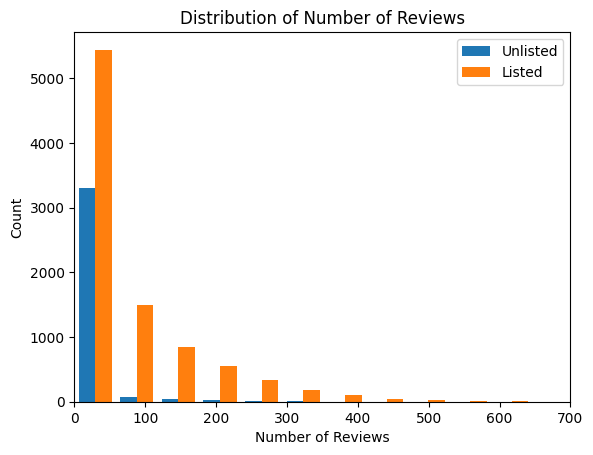

Average number of reviews for unlisted apartments: 8.523534507652325
Average number of reviews for listed apartments: 76.59526181777926


In [ ]:
# Merge the airbnb and reviews datasets based on apartment_id
merged_df = airbnb_df_train.merge(reviews_df_train, on='apartment_id', how='left')

# Filter unlisted and listed apartments
unlisted_apartments = merged_df[merged_df['unlisted'] == 1]
listed_apartments = merged_df[merged_df['unlisted'] == 0]

# Calculate the number of reviews for unlisted and listed apartments
unlisted_reviews_count = unlisted_apartments.groupby('apartment_id')['comments'].count()
listed_reviews_count = listed_apartments.groupby('apartment_id')['comments'].count()

# Plot the distribution of the number of reviews
plt.hist([unlisted_reviews_count, listed_reviews_count], bins=20, label=['Unlisted', 'Listed'])
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title('Distribution of Number of Reviews')
plt.legend()

# Rescale x-axis
plt.xlim(0, 700)  # Set the desired range for x-axis

plt.show()

# Calculate statistics
unlisted_reviews_mean = np.mean(unlisted_reviews_count)
listed_reviews_mean = np.mean(listed_reviews_count)

print("Average number of reviews for unlisted apartments:", unlisted_reviews_mean)
print("Average number of reviews for listed apartments:", listed_reviews_mean)


### Comments Variable

In [ ]:
print("Number of missing values in the comments column:", reviews_df_train['comments'].isnull().sum())

Number of missing values in the comments column: 0


In [ ]:
print("Checking for duplicated entries in the reviews:", reviews_df_train.duplicated().sum())

Checking for duplicated entries in the reviews: 15758


In [ ]:
duplicates = reviews_df_train.duplicated()
reviews_df_train[duplicates]

,comments
apartment_id,
16,.
19,👍
23,Great place!
25,.
31,.
...,...
12494,Excellent!
12494,.
12494,Great location


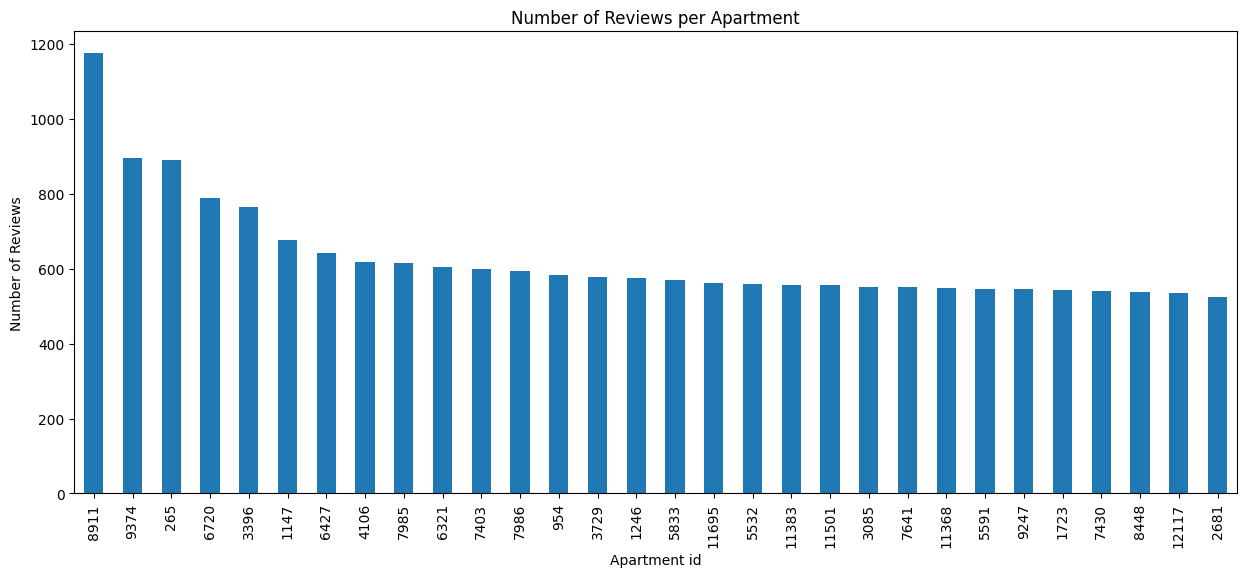

In [ ]:
#Checking the number of comments per apartment
reviews_per_apartment = reviews_df_train.groupby('apartment_id')['comments'].count().sort_values(ascending=False)[:30]

plt.figure(figsize=(15, 6))
reviews_per_apartment.plot(kind='bar')
plt.xlabel('Apartment id')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Apartment')
plt.show()

#### Word Count

In [ ]:
# Fetch wordcount for each abstract
reviews_df_train['word_count']  = reviews_df_train['comments'].apply(lambda x: len(str(x).split(" ")))
wordCount_df = reviews_df_train[['comments','word_count']].sort_values('word_count', ascending=True)
wordCount_df.head(20)

,comments,word_count
apartment_id,,
2038,Luis的房子地點非常的好，無論是地鐵、28號公車、或是其他交通工具。房子非常舒適，所有需要...,1
4311,RAS,1
11168,太超乎預期了！<br/>兩間房間都非常乾淨舒適<br/>有客廳又有餐廳<br/>廚房設備非常...,1
4255,Good,1
1070,X,1
9478,genial!,1
7204,素晴らしいロケーション、設備に加えInnlocoの顧客目線の迅速な対応が有り難かった。<br...,1
12167,great!,1
5127,.,1


##### Descriptive Statistics of word count

In [ ]:
reviews_df_train.word_count.describe()

count    721402.000000
mean         47.993793
std          46.922807
min           1.000000
25%          18.000000
50%          36.000000
75%          63.000000
max        1064.000000
Name: word_count, dtype: float64

<Axes: >

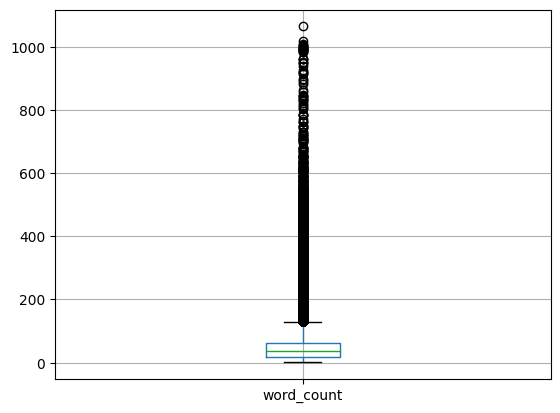

In [ ]:
reviews_df_train.boxplot(['word_count'])

<Axes: >

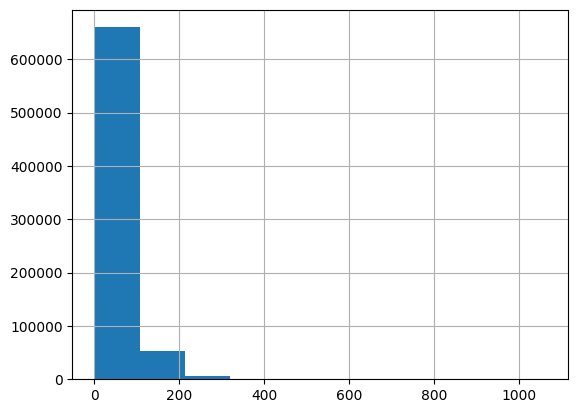

In [ ]:
reviews_df_train['word_count'].hist()

In [ ]:
#Checking the value that isn't a str in the reviews_df_train
checkType(reviews_df_train, 'comments')

<ipython-input-15-537b4b53aae9>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, comment in dataframe[column].iteritems():


Row 8779: 0
Total rows with non-string comments: 1


In [ ]:
airbnb_df_train.loc[8779]

description               Lovely apartment near "Alfama" (5 minutes walk...
host_about                  Costa do Castelo Terrace, em Rua dos Lagares, 8
unlisted                                                                  0
word_count_description                                                  167
word_count_host_about                                                     9
Name: 8779, dtype: object

In [ ]:
all_words = ' '.join(comment for comment in reviews_df_train['comments'] if isinstance(comment, str)).split()

In [ ]:
freq = pd.Series(all_words).value_counts()

In [ ]:
freq.sort_values(ascending=False)[0:10]

and     1098408
the     1028194
a        793019
to       653238
is       511900
in       497346
was      476359
of       347891
very     311495
The      285011
dtype: int64

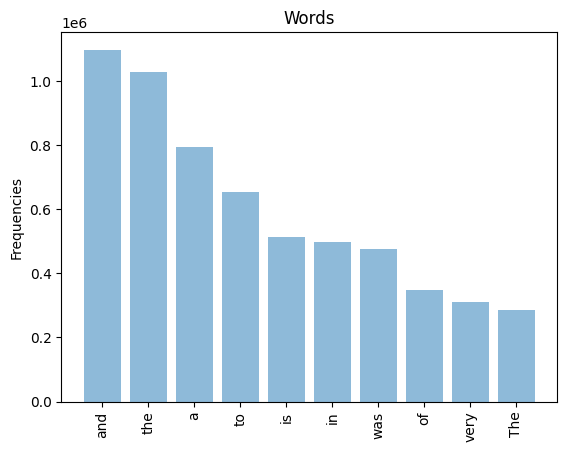

In [ ]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

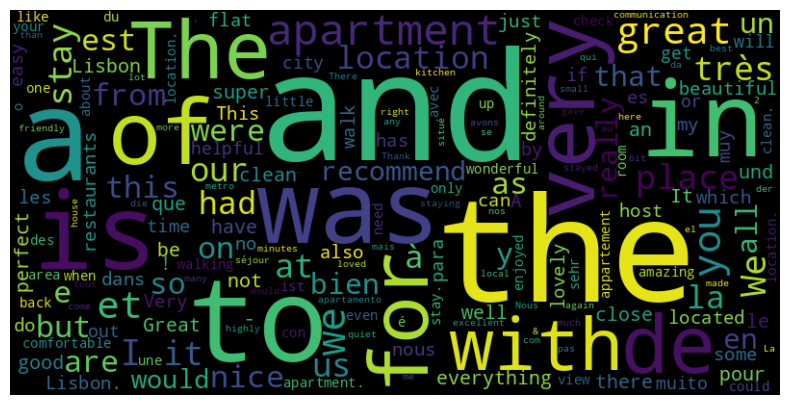

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Special characters

In [ ]:
reviews_df_train['non-alphabetic'] = reviews_df_train['comments'].apply(lambda x: len(re.findall(r'[^a-zA-Z\s]', str(x))))
sorted_df = reviews_df_train.sort_values('non-alphabetic', ascending=True)
filtered_df = sorted_df[sorted_df['non-alphabetic'] > 0]
filtered_df.head(20)

,comments,word_count,non-alphabetic
apartment_id,,,
814,"Nice apartment, I totally recommend",5,1
9316,Wonderful place!,3,1
10433,Very nice location in the very lively center o...,10,1
10432,En general bastante bien las camas deja que de...,24,1
9325,great Place.,2,1
10293,Un lugar mágico,3,1
1171,tip top!,2,1
2809,"Un lindo departamento, muy bien ubicado",6,1
2809,We had a wonderful stay and would happily stay...,11,1


#### Emojis

In [ ]:
#all comments that contain emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Create a new column with extracted emojis
reviews_df_train['emojis'] = reviews_df_train['comments'].astype(str).apply(lambda x: ''.join(emoji_pattern.findall(x)))

# Replace empty cells with NaN
reviews_df_train['emojis'].replace('', pd.NA, inplace=True)

# Print the updated dataset
non_null_values=reviews_df_train['emojis'].notna()
reviews_df_train.loc[non_null_values, 'emojis']


apartment_id
1         😊
1        🇧🇷
5        👌🏻
8         😊
9        🙂😁
         ..
12490     😉
12492     😁
12492    👍😊
12494     🙂
12494     😉
Name: emojis, Length: 10578, dtype: object

In [ ]:
# Create a boolean mask for values that only contain emojis
emoji_values = reviews_df_train['comments'].astype(str).apply(lambda x: emoji_pattern.fullmatch(x) is not None)

# Get the values of the column that only contain emojis
emoji_data = reviews_df_train.loc[emoji_values, 'comments']

# Print the values that only contain emojis
emoji_data.head()

apartment_id
11      👍
19      👍
129     💚
130     👍
163    👍🏼
Name: comments, dtype: object

In [ ]:
#number of reviews that only contain emojis: we must do something about it
print("Number of reviews only containing emojis:", emoji_data.shape[0])

Number of reviews only containing emojis: 332


#### Numerical values

In [ ]:
filtered_df['numerical'] = filtered_df['comments'].apply(lambda x: len(re.findall(r'\d+', str(x))))
sorted_df_numerical = filtered_df.sort_values('numerical', ascending=True)
filtered_df_numerical = sorted_df_numerical[sorted_df_numerical['numerical'] > 0]
filtered_df_numerical.head(20)

<ipython-input-64-7568dbf63db9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['numerical'] = filtered_df['comments'].apply(lambda x: len(re.findall(r'\d+', str(x))))


,comments,word_count,non-alphabetic,numerical
apartment_id,,,,
8010,La casa es magnífica y es fiel a las fotos pub...,80,31,1
11501,Very very good apartament situated in a very q...,35,7,1
3758,"Hugo is a 5 star host, the flat is perfect, cl...",26,7,1
6531,Our stay at RP 28 was fantastic. Great locati...,92,21,1
8204,Nous avons été accueillis par une personne ext...,103,45,1
8361,Nous séjourné dans l’appartement pour 4 nuits ...,80,31,1
9640,Fernanda’s small apartment has everything you ...,187,46,1
4541,"Espaço com uma localização incrível, perto de ...",51,21,1
1965,The house is beautiful and in a nice neighborh...,44,7,1


In [ ]:
filtered_df_numerical.sort_values(['non-alphabetic', 'numerical'], ascending=True).head(20)

,comments,word_count,non-alphabetic,numerical
apartment_id,,,,
110,Muito top 5estrelas,3,1,1
8276,5 STAR,2,1,1
9828,yo recomiendo ese apartamento a todo el mundo ...,27,1,1
11948,Apartamento 5 estrelas,3,1,1
336,5 star,2,1,1
6171,5 estrelas,2,1,1
8438,we had a great stay in Lisboa at Booked4stay,9,1,1
6815,Nice and well equipped clean appartment The ...,45,1,1
4768,Maria is 5 star,4,1,1


###Language detection

In [ ]:
reviews_df_test

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...
...,...,...
80872,1387,We had a great time in the apartment. The apar...
80873,1387,Excelente apartamento! Ótimo anfitrião! Aparta...
80874,1387,"Nice apartment, spacius, well equipt and clean..."
80875,1388,Unfortunately not a pleasant experience. The h...


In [ ]:
df_reduced_test = reviews_df_test.groupby('index').head(5)

# Output the reduced DataFrame
print(df_reduced_test)

       index                                           comments
0          1  Thank you very much Antonio ! All has been per...
1          1  Very nice appartment in the old town of Lissab...
2          1  When travelling we're looking for kids friendl...
3          1  We've been in Lisbon in march 2013 (3 adults a...
4          1  Our host Antonio was very helpful with informa...
...      ...                                                ...
80829   1387  Hemos estado cuatro días,  y ha sido como si e...
80830   1387  Tiago is a nice guy, with an amazing apartment...
80831   1387  Apartamento muy cómodo y bonito, recién reform...
80875   1388  Unfortunately not a pleasant experience. The h...
80876   1388  Hi everybody!<br/>If you want to live with coc...

[4519 rows x 2 columns]


In [ ]:
def detect_language(text):
    if isinstance(text, str) and text.strip() != '':
        try:
            return detect(text)
        except:
            return 'Unknown language'
    else:
        return np.nan

In [ ]:
df_reduced_test['language'] = df_reduced_test['comments'].apply(detect_language)

In [ ]:
df_reduced_test

,index,comments,language
0,1,Thank you very much Antonio ! All has been per...,Unknown language
1,1,Very nice appartment in the old town of Lissab...,Unknown language
2,1,When travelling we're looking for kids friendl...,Unknown language
3,1,We've been in Lisbon in march 2013 (3 adults a...,Unknown language
4,1,Our host Antonio was very helpful with informa...,Unknown language
...,...,...,...
80829,1387,"Hemos estado cuatro días, y ha sido como si e...",Unknown language
80830,1387,"Tiago is a nice guy, with an amazing apartment...",Unknown language
80831,1387,"Apartamento muy cómodo y bonito, recién reform...",Unknown language
80875,1388,Unfortunately not a pleasant experience. The h...,Unknown language


## Preprocessing

In [ ]:
languages = {
    "en": "english",
    "fr": "french",
    "pt": "portuguese",
    "es": "spanish",
    "de": "german",
    "it": "italian",
    "nl": "dutch",
    "ru": "russian",
    "ko": "korean",
    "zh": "chinese",
    "ro": "romanian",
    "pl": "polish"
}


In [ ]:
spacy_language_packages = {
    'en': 'en_core_web_sm',
    'fr': 'fr_core_news_sm',
    'pt': 'pt_core_news_sm',
    'es': 'es_core_news_sm',
    'de': 'de_core_news_sm',
    'it': 'it_core_news_sm',
    'nl': 'nl_core_news_sm',
    'ru': 'ru_core_news_sm',
    'ko': 'ko_core_news_sm',
    'zh': 'zh_core_web_sm',
    'ro': 'ro_core_news_sm',
    'pl': 'pl_core_news_sm',
}

In [ ]:
with open('preprocessed_airbnb_df_train.pickle', 'rb') as data:
    preprocessed_airbnb_df_train = pickle.load(data)

In [ ]:
preprocessed_airbnb_df_train

,description,description_language,host_about,host_about_language,index,unlisted
0,"[joli, appartemer, bordure, mer, min, pied, pl...",fr,"[être, famille, enfant, an, habiter, année, po...",fr,5.0,0.0
1,"[apartamento, charmoso, chiado, largo, carmo, ...",pt,"[hello, m, portuguese, love, meet, people, wor...",en,4.0,0.0
2,"[dear, guest, pleaser, receive, home, guest, r...",en,"[quiet, person, like, cinema, reading, writing...",en,11.0,0.0
3,"[walk, original, wooden, stair, entrance, apar...",en,"[service, holiday, apartment, casa, azenhas, m...",en,10.0,0.0
4,"[espaço, ficar, parque, eduardo, vii, saldanha...",pt,"[friendly, host, try, need, quit, strict, hous...",en,2.0,1.0
...,...,...,...,...,...,...
11965,"[beautifully, locate, heart, lisbon, historic,...",en,"[found, travel, enthusiast, like, bnbird, want...",en,12493.0,0.0
11966,"[welcome, lapa, garden, luxurious, bedroom, ap...",en,"[bear, spain, grow, study, portugal, spain, fr...",en,12486.0,0.0
11967,"[national, tourism, board, create, clean, safe...",en,"[hello, my, name, is, pedro, and, lover, to, t...",fr,12488.0,1.0
11968,"[cat, bairro, altothis, cozy, apartment, lisbo...",en,"[travel, favorite, hobby, visit, country, euro...",en,12492.0,0.0


In [ ]:
selected_languages = list(languages.keys())  # Get the language codes

# Filter the dataset based on the selected languages
reviews_df = reviews_df_train[reviews_df_train['language'].isin(selected_languages)]

In [ ]:
reviews_df['language'] = reviews_df['language'].replace('zh-cn', 'zh')

<ipython-input-10-ee6589d4bcdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['language'] = reviews_df['language'].replace('zh-cn', 'zh')


In [ ]:
df_reduced = reviews_df.groupby('apartment_id').head(1)

# Output the reduced DataFrame
print(df_reduced)

           apartment_id                                           comments  \
review_id                                                                    
0                     1  this is a very cozy and comfortable house to s...   
50                    5  Un très bel appartement avec une magnifique vu...   
91                    8  Shani was very helpful throughout our process!...   
259                   9  Nous avons passé un très bon séjour chez Isabe...   
292                  10  WOW, what a great stay! The spacious apartment...   
...                 ...                                                ...   
720803            12490  Excellent very well equiped apartment! Thank you!   
720835            12491  I am so happy to found this accomodation near ...   
720846            12492  Appartement très bien situé en plein coeur du ...   
721158            12493     Nice place, nice location, easy communication!   
721193            12494  Appartement bien situé et situé au cent

In [ ]:
df_reduced['language'].value_counts()

en    5376
fr    1105
pt     871
es     697
de     198
it      99
nl      47
ru      36
ro      11
pl      10
ko      10
Name: language, dtype: int64

### HTML tags

In [ ]:
def remove_html_tags(row, textcolname):
    cleaned_comment = re.sub('<[^<]+?>', '', row[textcolname])
    row[textcolname] = cleaned_comment
    return row


Non word strings

In [ ]:
def remove_non_word_strings(row,textcolname):
    cleaned_phrase = re.sub(r"\b\w+\b", lambda m: m.group() if m.group().isalpha() else "", row[textcolname])
    row[textcolname] = cleaned_phrase
    return row

### Sentiment

In [ ]:
def create_sentiment_col(row,textcolname):
    file_name_positive = r"sentiment_words/sentiment-lexicons/positive_words_" + row['language'] + ".txt"
    file_name_negative = r"sentiment_words/sentiment-lexicons/negative_words_" + row['language'] + ".txt"
    with open(file_name_positive, "r", encoding="utf-8", errors='ignore') as f:
        positive_words = [word.strip().lower() for word in f.readlines()]
    with open(file_name_negative, "r", encoding="utf-8", errors='ignore') as f:
        negative_words = [word.strip().lower() for word in f.readlines()]

    comment = ' '.join(row[textcolname])

    positive_count = sum(1 for word in positive_words if re.search(r'\b{}\b'.format(re.escape(word)), comment, flags=re.IGNORECASE))
    negative_count = sum(1 for word in negative_words if re.search(r'\b{}\b'.format(re.escape(word)), comment, flags=re.IGNORECASE))

    if positive_count > negative_count:
        sentiments ='positive'

    elif negative_count > positive_count:
        sentiments = 'negative'

    else:
        sentiments = 'neutral'

    row['sentiment'] = sentiments

    return row


Tokinezed, punctuation, lower, lemma and remove some not useful characters and empty spaces

In [ ]:
def token_punct_stop_lemma(row,textcolname):

    nlp = spacy.load(spacy_language_packages[row['language']])

    # Tokenize the sentence
    doc = nlp(row[textcolname])


    # Remove stop words and lemmatize the tokens
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    tokens = [token.replace('\r', '') for token in tokens]
    tokens = [token.replace('\n', '') for token in tokens]
    tokens = [token for token in tokens if token.strip() != '']
    tokens = [token for token in tokens if token.strip() != ' ']

    row[textcolname] = tokens
    return row



Emojis

In [ ]:
# Function to replace emojis with their meanings
def replace_emojis_with_meanings(text):
    if isinstance(text, int):
        text = str(text)

    words = text.split()
    for i, word in enumerate(words):
        if emoji.is_emoji(word):
            words[i] = emoji.demojize(word).replace(":", "").replace("_", " ").title()
    return " ".join(words)

In [ ]:
# Apply the function to the 'text' column
reviews_df_train['comments'] = reviews_df_train['comments'].apply(replace_emojis_with_meanings)

# JUST TO CHECK THE DIFFERENCE IN THE DISAPOINTED COMMENT
print(reviews_df_train[(reviews_df_train.index == 2629) & (reviews_df_train['word_count'] == 2)])

### Clean
(Performing all the functions created above now in one)

In [ ]:
def preprocessing(dataset, textcolname):

    preprocessed = pd.DataFrame()

    for row in range(len(dataset)):

        no_html = remove_html_tags(dataset.iloc[row],textcolname)

        no_weird = remove_non_word_strings(no_html,textcolname)

        tokens = token_punct_stop_lemma(no_weird,textcolname)

        sentiment = create_sentiment_col(tokens,textcolname)

        preprocessed = preprocessed.append(sentiment, ignore_index = True)

    return preprocessed



In [ ]:
preprocessed_small = preprocessing(df_reduced, 'comments')
preprocessed_small

,apartment_id,comments,word_count,language,sentiment
0,1,"[cozy, comfortable, house, stay, in.never, wor...",28,en,positive
1,5,"[bel, appartemer, magnifique, vue, plage, mer,...",47,fr,positive
2,8,"[shani, helpful, process, thank, answer, fast,...",17,en,positive
3,9,"[passer, bon, séjour, isabel, helder, appartem...",72,fr,positive
4,10,"[wow, great, stay, spacious, apartment, brand,...",133,en,positive
...,...,...,...,...,...
8455,12490,"[excellent, equip, apartment, thank]",7,en,positive
8456,12491,"[happy, find, accomodation, near, cascais, lik...",99,en,positive
8457,12492,"[appartement, bien, situer, plein, coeur, bair...",45,fr,positive
8458,12493,"[nice, place, nice, location, easy, communicat...",6,en,positive


In [ ]:
with open('preprocessed_small_train_df.pickle', 'wb') as output:
    pickle.dump(preprocessed_small, output)